# CDL Cohort Project Week 1: Task 2
This notebook summarizes Boston Quantum's implementation of the blockade approximation for $\mathbb{Z}_2$ state preparation using the `Bloqade` simulator. `Bloqade` is a Julia language package for simulating quantum computation and quantum dynamics based on neutral-atom architectures.

In [1]:
using Bloqade
using KrylovKit
using SparseArrays
using PythonCall

plt = pyimport("matplotlib.pyplot");

## 1. Full Space Simulation: Preparation of $\mathbb{Z}_2$ States in 1D
The simulation in this section is the same as what was run in Task 1. Here, however, we increase `nsites` to a maximum value of 13. After this, it seems to make too long to run the following cells.

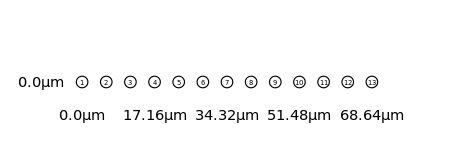

In [2]:
nsites = 13
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [3]:
# Generate control fields for a given total_time
total_time = 5.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, total_time-0.9, total_time-0.8, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, total_time-0.9, total_time], values = [U1, U1, U2, U2]);

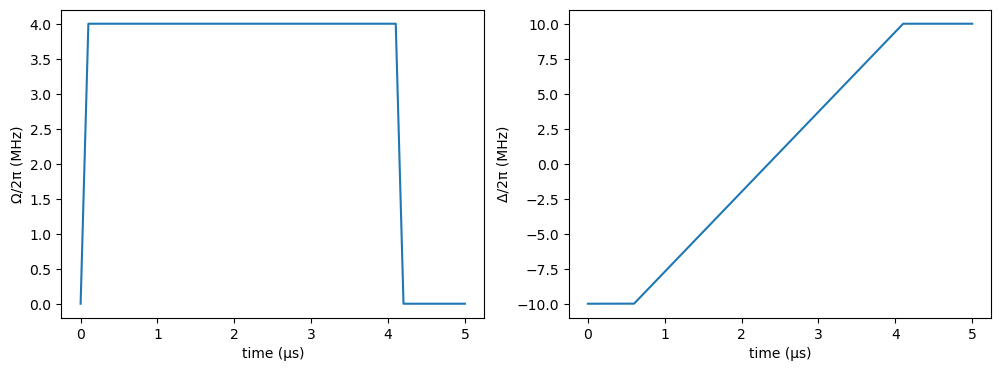

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

In [5]:
h = rydberg_h(atoms; Δ, Ω)

nqubits: 13
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


In [6]:
reg = zero_state(nsites);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

In [7]:
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))  
end

Dvals = hcat(densities...);

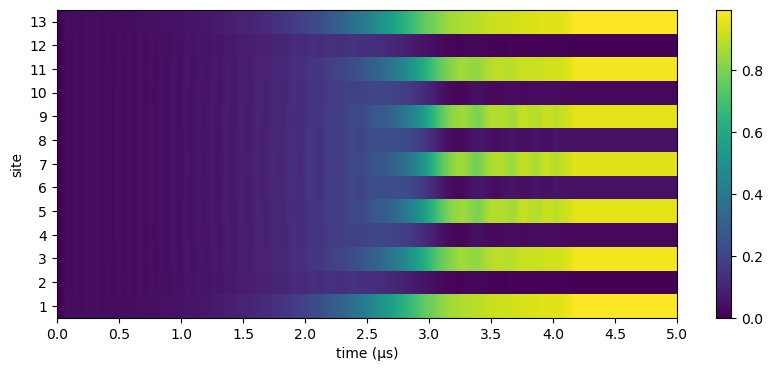

In [8]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(Dvals), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")

dt = total_time / 10
ax.set_xticks(0:dt:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

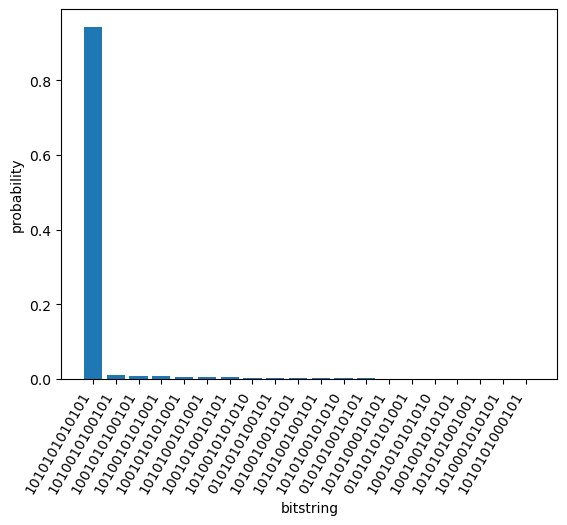

In [9]:
bitstring_hist(reg; nlargest = 20)

## 2. Blockade Subspace Simulation: Preparation of $\mathbb{Z}_2$ States in 1D
Here, by using the blockade subspace, we are able to increase the maximum number of atoms in the chain, i.e. `nsites` to 17. This is a modest increase over the full space simulation above, but still worthwhile! 

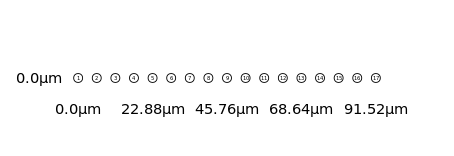

In [10]:
nsites = 17
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [11]:
# Generate control fields for a given total_time
total_time = 10.0;
Ω_max = 2π * 4.3;
Ω = piecewise_linear(clocks = [0.0, 0.1, total_time-0.9, total_time-0.8, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, total_time-0.9, total_time], values = [U1, U1, U2, U2]);

In [12]:
h = rydberg_h(atoms; Δ, Ω)

# Create blockade subspace
space = blockade_subspace(atoms, 5.73);

# Create register in the subspace
reg = zero_state(space);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

In [13]:
densities = []

for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))  
end

Dvals = hcat(densities...);

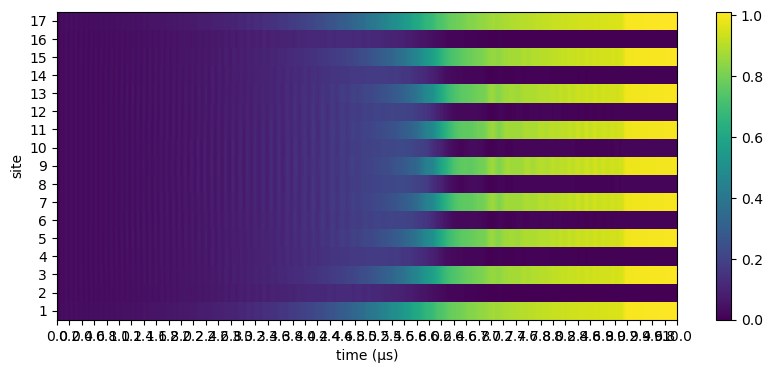

In [14]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(Dvals), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

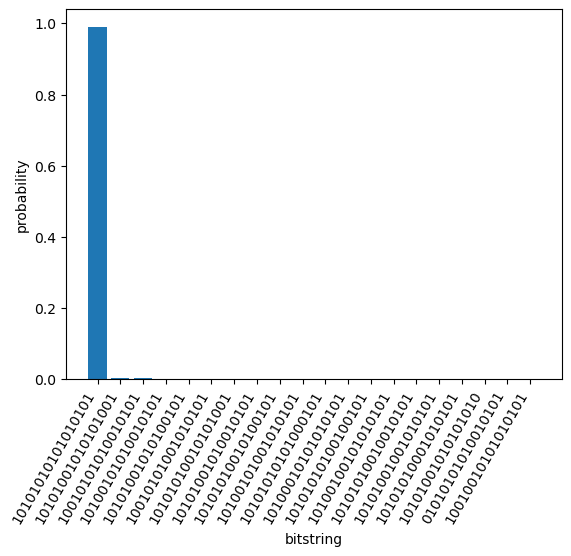

In [15]:
bitstring_hist(reg; nlargest = 20)

## 3. Blockade Subspace Simulation: Preparation of $\mathbb{Z}_2$ States in 2D
Here, the largest square array we can simulate is $4\times 4$. After that, it takes too long for the following cells to run:

In [ ]:
nx, ny = 4, 4
nsites = nx * ny
atoms = generate_sites(SquareLattice(), nx, ny, scale = 6.7)

In [ ]:
total_time = 3.0
Ω_max = 2π * 4.3
Ω = piecewise_linear(clocks = [0.0, 0.3, total_time-0.3, total_time], values = [0.0, Ω_max, Ω_max, 0]);

U = 2π * 15.0
Δ = piecewise_linear(clocks = [0.0, 0.3, total_time-0.3, total_time], values = [-U, -U, U, U]);

In [ ]:
h = rydberg_h(atoms; Δ, Ω)
reg = zero_state(nsites);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

In [ ]:
densities = [];
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")

dt = total_time / 10
ax.set_xticks(0:dt:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

In [ ]:
bitstring_hist(reg; nlargest = 20)